In [2]:
import numpy as np
from optimize_vars import make_virus, optimize_by_parts
import matplotlib.pyplot as plt
from data import Data
from Virus import EVENT_ARR, T_VACCINE, T_END
import ipywidgets as widgets

In [3]:
data = Data()
cases_data = data.reported_cases
vaccination_data = data.reported_vaccination
death_data = data.reported_deaths

In [3]:
res = optimize_by_parts(first_stage_only=True)
print(res)

{'x': array([ 0.67380269,  0.2724054 ,  0.43827307, 20.98781012,  0.19922325,
        0.02192446]), 'kappa_array': [0.07070338632422882], 'contact_trace': 0.0019027222680555456, 'y0': array([7966732.81049656,     972.66216108,     269.55904385,
          2719.50925048,   12199.42796108,   -3395.61336425,
         -1040.29425985,    5861.20377479,    5192.79782823,
             0.        ])}


In [13]:
params ={
    'x': np.array([ 0.71534496, 0.22803664, 0.48380948, 20.97253698, 0.19946303, 0.02189386]),
    'kappa_array': [0.07039722784832704],
    'contact_trace': 0.00027800552003383127,
    'y0': np.array([7965896.84948666,     996.40930102,     277.44117551,
          2759.6397863 ,   12210.20339811,   -3376.08392879,
         -1018.0597461 ,    5900.09272012,    5184.81731564,
             0.        ])
}

In [15]:
test = make_virus(params=params)
c_m, d_m, V = test.results(0, EVENT_ARR[1])

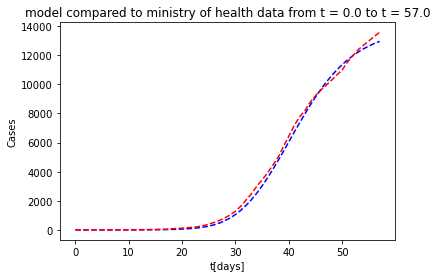

In [17]:
t = np.arange(0 , EVENT_ARR[1])
fig, ax = plt.subplots()
ax.set(xlabel='t[days]', ylabel='Cases',
            title=f'model compared to ministry of health data from t = {t[0]} to t = {t[-1]}')
ax.plot(t, c_m, 'b--')
ax.plot(t, cases_data[:int(EVENT_ARR[1])], 'r--')



In [6]:
cont_res = optimize_by_parts(params=res, skip_first_stage=True)
print(cont_res)



{'x': array([ 0.67380269,  0.2724054 ,  0.43827307, 20.98781012,  0.19922325,
        0.02192446]), 'kappa_array': [0.07070338632422882, 0.19701398528587588, 0.0008426460837257649, 0.17809699853899322, 0.0009387083994062129, 0.10862364106728528], 'contact_trace': 0.0019027222680555456, 'y0': array([ 3.89809340e+06,  1.35455107e+05,  1.79943851e+04,  1.81369648e+05,
        6.95147199e+09, -4.32810381e+09, -6.95054614e+09,  3.41484073e+05,
        4.32814105e+09,  2.44364503e+06]), 'm_array': [0.0002279386593015409, 0.023903718555078002, 0.0027137501776883025, 0.06457474118561596, 0.0003793206107104985], 'vaccine_parameters': array([0.9012482 , 0.03531084, 0.68413908])}


In [23]:
cont_params = {
    'x': np.array([ 0.67380269,  0.2724054 ,  0.43827307, 20.98781012,  0.19922325, 0.02192446]),
    'kappa_array': [0.07070338632422882, 0.19701398528587588, 0.0008426460837257649, 0.17809699853899322, 0.0009387083994062129, 0.10862364106728528],
    'contact_trace': 0.0019027222680555456,
    'y0': np.array([ 3.89809340e+06,  1.35455107e+05,  1.79943851e+04,  1.81369648e+05,
                    6.95147199e+09, -4.32810381e+09, -6.95054614e+09,  3.41484073e+05,
                    4.32814105e+09,  2.44364503e+06]),
    'm_array': [0.0002279386593015409, 0.023903718555078002, 0.0027137501776883025, 0.06457474118561596, 0.0003793206107104985],
    'vaccine_parameters': np.array([0.9012482 , 0.03531084, 0.68413908])
}


In [24]:
cont_test = make_virus(cont_params)
c_m, d_m, V = cont_test.results(0, T_END)

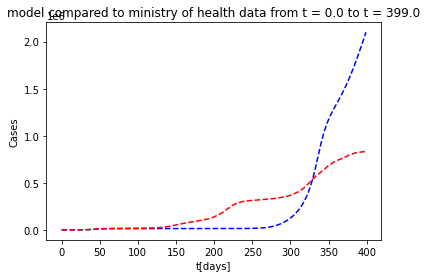

In [25]:
t = np.arange(0 , T_END)
fig, ax = plt.subplots()
ax.set(xlabel='t[days]', ylabel='Cases',
            title=f'model compared to ministry of health data from t = {t[0]} to t = {t[-1]}')
ax.plot(t, c_m, 'b--')
ax.plot(t, cases_data[0:int(T_END)], 'r--')

In [4]:
@widgets.interact
def draw(
        kappa0 = (-0.4, 0.5, 0.000001),
        kappa1 = (-0.5, 0.5, 0.000001),
        kappa2 = (-0.5, 0.5, 0.000001),
        kappa3 = (-0.5, 0.5, 0.000001),
        kappa4 = (-0.5, 0.5, 0.000001),
        kappa5 = (-0.5, 0.5, 0.000001),
        kappa6 = (-0.5, 0.5, 0.000001),
        m0 = (0.000001, 1, 0.000001),
        m1 = (0.000001, 1, 0.000001),
        m2 = (0.000001, 1, 0.000001),
        m3 = (0.000001, 1, 0.000001),
        m4 = (0.000001, 1, 0.000001),
        m5 = (0.000001, 1, 0.000001),
        eta = (0.000001, 1, 0.000001),
        vaccination_rate = (0.000001, 1, 0.000001),
        vaccine_eligibility = (0.000001, 1, 0.000001)
):

    params = {
        'x': np.array([ 0.71534496,  0.22803664,  0.48380948, 20.97253698,  0.19946303,0.02189386]),
        'kappa_array': [kappa0, kappa1, kappa2, kappa3, kappa4, kappa5, kappa6],
        'contact_trace': 0.00027800552003383127,
        'm_array': [m0, m1, m2, m3, m4, m5],
        'vaccine_parameters': np.array([eta, vaccination_rate, vaccine_eligibility])
    }
    virus = make_virus(params)
    c_m, d_m, v_m = virus.results(0, T_END)

    for i, t in enumerate(zip(EVENT_ARR, np.append(EVENT_ARR, [T_END])[1:])):
        fig, ax = plt.subplots()

        t_min, t_max = t
        t_arr = np.arange(t_min, t_max)
        ax.plot(t_arr, c_m[int(t_min):int(t_max)], 'b--')
        ax.plot(t_arr, cases_data[int(t_min):int(t_max)], 'r--')
        ax.set(xlabel='t[days]', ylabel='cases[people]',
            title=f'model compared to ministry of health data from t = {t_min} to t = {t_max}')

    fig, ax = plt.subplots()
    t_arr = np.arange(T_VACCINE, T_END)
    ax.set(xlabel='t[days]', ylabel='Vaccination',
            title=f'Vaccine model compared to ministry of health data from t = {T_VACCINE} to t = {T_END}')
    ax.plot(t_arr, vaccination_data[int(T_VACCINE):int(T_END)], 'r--')
    ax.plot(t_arr, v_m[int(T_VACCINE):int(T_END)], "b--")


interactive(children=(FloatSlider(value=0.04999999999999993, description='kappa0', max=0.5, min=-0.4, step=1e-…

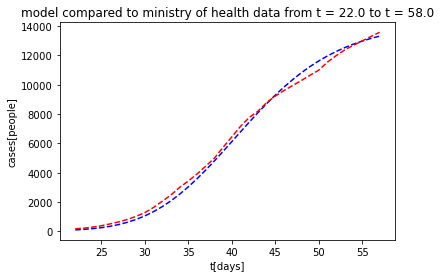

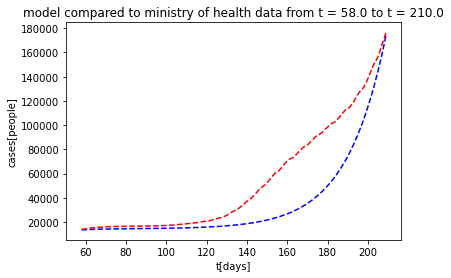

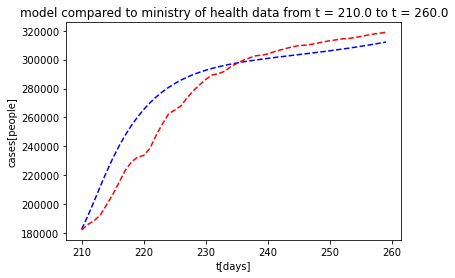

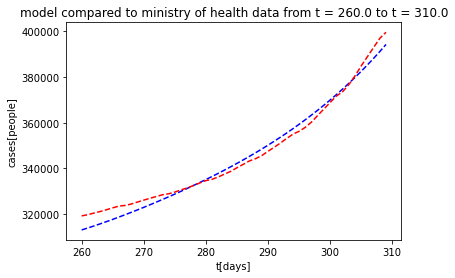

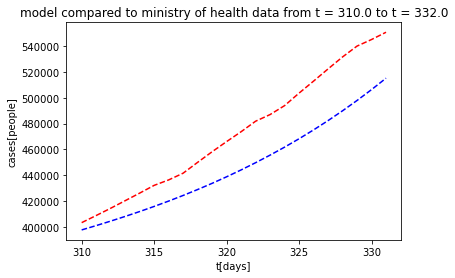

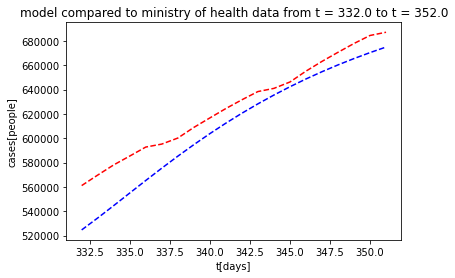

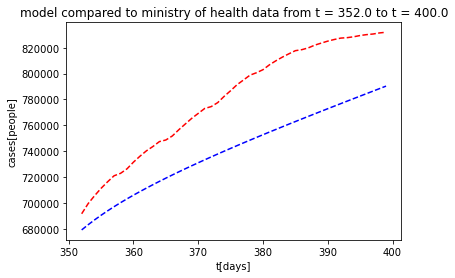

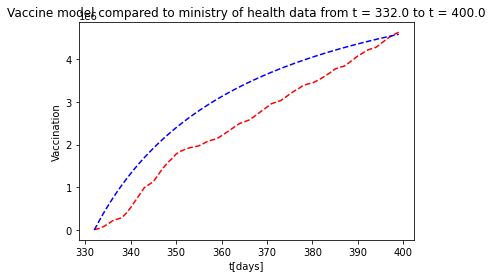

In [5]:
""""
results after tweaking with the model
"""
draw(
    kappa0 = 0.069534496,
    kappa1 = 0.00402893239089457,
    kappa2 = 0.25166880988185178,
    kappa3 = 0.0542622137179662,
    kappa4 = -0.00845,
    kappa5 = 0.12,
    kappa6 = 0.043,
    m0 = 0.21,
    m1 = 0.00175,
    m2 = 0.0005702965665175,
    m3 = 0.00015,
    m4 = 0.00003,
    m5 = 0.000003,
    eta = 0.95,
    vaccination_rate = 0.03,
    vaccine_eligibility = 0.85
)

In [6]:
final_params = {
    'x': np.array([ 0.71534496,  0.22803664,  0.48380948, 20.97253698,  0.19946303,0.02189386]),
    'kappa_array': [0.069534496, 0.00402893239089457, 0.25166880988185178, 0.0542622137179662,
                    -0.00845, 0.12, 0.043],
    'contact_trace': 0.00027800552003383127,
    'y0': np.array([ 3.58795629e+06,  6.29179911e+04,  8.34779371e+03,  6.48365014e+04,
        6.93237159e+09, -4.31803955e+09, -6.93215512e+09,  8.57448508e+04,
        4.31804921e+09,  3.97476917e+06]),
    'm_array': [0.21, 0.00175,0.0005702965665175, 0.00015, 0.00003, 0.000003],
    'vaccine_parameters': np.array([0.95, 0.03, 0.85])
}


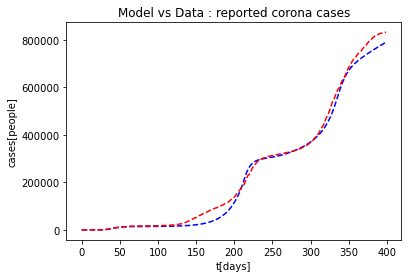

In [7]:
final_results = make_virus(final_params)
c_m, d_m, V = final_results.results(0, T_END)
t = np.arange(0 , T_END)
_, ax = plt.subplots()
ax.set(xlabel ='t[days]', ylabel='cases[people]', title='Model vs Data : reported corona cases')

ax.plot(t, c_m, 'b--')
ax.plot(t, cases_data[:int(T_END)], 'r--')

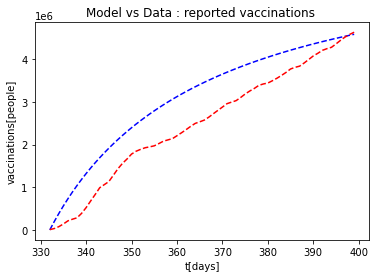

In [8]:
_, ax = plt.subplots()
ax.set(xlabel ='t[days]', ylabel='vaccinations[people]', title='Model vs Data : reported vaccinations ')
t = np.arange(T_VACCINE , T_END)
ax.plot(t, V[int(T_VACCINE):], 'b--')
ax.plot(t, vaccination_data[int(T_VACCINE):int(T_END)], 'r--')

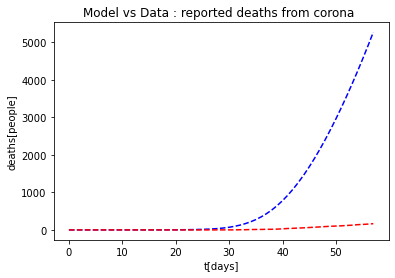

In [10]:
_, ax = plt.subplots()
ax.set(xlabel ='t[days]', ylabel='deaths[people]', title='Model vs Data : reported deaths from corona ')
stop = EVENT_ARR[1]
t = np.arange(0 , stop)
ax.plot(t, d_m[:int(stop)], 'b--')
ax.plot(t, death_data[0:int(stop)], 'r--')


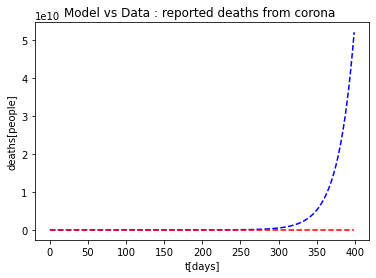

In [26]:
_, ax = plt.subplots()
ax.set(xlabel ='t[days]', ylabel='deaths[people]', title='Model vs Data : reported deaths from corona ')
stop = T_END
t = np.arange(0 , stop)
ax.plot(t, d_m[:int(stop)], 'b--')
ax.plot(t, death_data[0:int(stop)], 'r--')


In [31]:
from scipy.integrate import solve_ivp
from Virus import GLOBAL_N as N
y0 = np.array([N, 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float)

sol = solve_ivp(
            final_results.derivatives,
            (0, T_END),
            y0=y0,
            t_eval=np.arange(0, T_END),
            vectorized=True,
            method="LSODA",

)
S, E, I, I_u, H_R, H_D, R_d, R_u, D, V = sol.y
sol_dict = {'S' : S, 'E' : E, 'I' : I, 'I_u' : I_u, 'H_R' : H_R, 'H_D' : H_D, 'R_d' : R_d, 'R_u' : R_u, 'D' : D, 'V' : V}

E - [0.28039216 0.33815827 0.98516223 1.        ]
I - [0.06078431 0.63647424 0.94108925 1.        ]
I_u - [0.16666667 0.8660254  0.8660254  1.        ]
H_R - [0.38627451 0.98408634 0.76736268 1.        ]
H_D - [0.61372549 0.98408634 0.64121331 1.        ]
R_d - [0.83333333 0.8660254  0.5        1.        ]
R_u - [1.         0.63647424 0.33815827 1.        ]
D - [1.         0.33815827 0.17162568 1.        ]
V - [1. 0. 0. 1.]


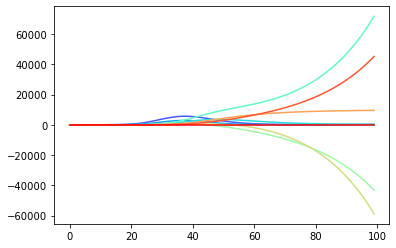

In [36]:
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, len(sol.y)))
t = np.arange(0, 100)
_, ax = plt.subplots()
for c, i in zip(colors, sol_dict):
    if i != 'S':
        print(f'{i} - {c}')
        ax.plot(t, sol_dict[i][:100], color = c)

